<a href="https://colab.research.google.com/github/carlosnylander/TrabalhoML/blob/main/atividade_4_codigos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Dados 1 (correlacionados) ===
  Slope        : 1.969
  Intercept    : 1.045
  r-value      : 0.970
  p-value      : 1.553e-05
  Covariância  : 18.691
  → Interpretação:
    - Slope positivo forte indica relação linear positiva.
    - r-value próximo de 1 e p-value muito baixo (<0.05) confirmam correlação significativa.
    - Covariância > 0 indica que x e y variam na mesma direção.

=== Dados 2 (aleatórios) ===
  Slope        : -1.529
  Intercept    : 15.818
  r-value      : -0.571
  p-value      : 0.108
  Covariância  : -3.269
  → Interpretação:
    - Slope próximo de 0 e r-value baixo indicam pouca ou nenhuma correlação.
    - p-value alto (>0.05) indica que não podemos rejeitar hipótese nula de ausência de correlação.
    - Covariância próxima de zero reflete falta de relação linear.



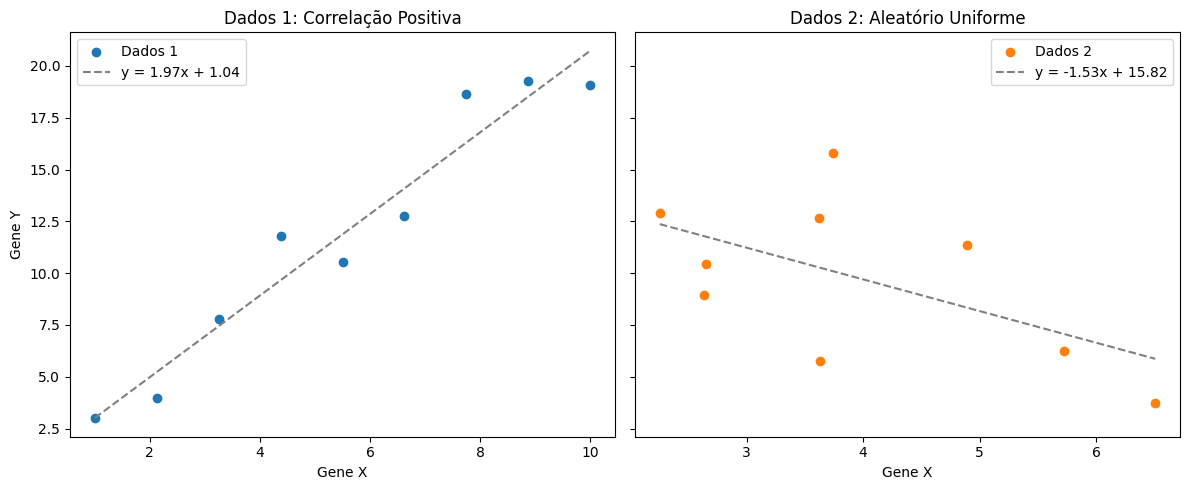

In [ ]:
# =============================================================================
# Exemplo completo: Geração de dois conjuntos de 9 pontos, regressão linear,
# cálculo de p-value, covariância e plotagem lado a lado.
# =============================================================================

# 1) Importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 2) Fixar semente para reprodutibilidade
np.random.seed(42)

# 3) Dados 1: correlação positiva
#    - x1: 9 pontos igualmente espaçados entre 1 e 10
x1 = np.linspace(1, 10, 9)
#    - y1: relação y = 2·x1 + ruído gaussiano (sigma=2)
noise = np.random.normal(loc=0, scale=2, size=x1.size)
y1 = 2.0 * x1 + noise

# 4) Dados 2: aleatórios uniformes no mesmo intervalo de x1 e y1
x2 = np.random.uniform(low=x1.min(), high=x1.max(), size=x1.size)
y2 = np.random.uniform(low=y1.min(), high=y1.max(), size=x1.size)

# 5) Ajuste de regressão linear com scipy.stats.linregress
#    Isso nos dá slope, intercept, rvalue, pvalue e stderr
res1 = linregress(x1, y1)
res2 = linregress(x2, y2)

# 6) Cálculo da covariância (elemento [0,1] da matriz)
cov1 = np.cov(x1, y1, ddof=1)[0,1]
cov2 = np.cov(x2, y2, ddof=1)[0,1]

# 7) Impressão dos resultados e interpretações
print("=== Dados 1 (correlacionados) ===")
print(f"  Slope        : {res1.slope:.3f}")
print(f"  Intercept    : {res1.intercept:.3f}")
print(f"  r-value      : {res1.rvalue:.3f}")
print(f"  p-value      : {res1.pvalue:.3e}")
print(f"  Covariância  : {cov1:.3f}")
print("  → Interpretação:")
print("    - Slope positivo forte indica relação linear positiva.")
print("    - r-value próximo de 1 e p-value muito baixo (<0.05) confirmam correlação significativa.")
print("    - Covariância > 0 indica que x e y variam na mesma direção.\n")

print("=== Dados 2 (aleatórios) ===")
print(f"  Slope        : {res2.slope:.3f}")
print(f"  Intercept    : {res2.intercept:.3f}")
print(f"  r-value      : {res2.rvalue:.3f}")
print(f"  p-value      : {res2.pvalue:.3f}")
print(f"  Covariância  : {cov2:.3f}")
print("  → Interpretação:")
print("    - Slope próximo de 0 e r-value baixo indicam pouca ou nenhuma correlação.")
print("    - p-value alto (>0.05) indica que não podemos rejeitar hipótese nula de ausência de correlação.")
print("    - Covariância próxima de zero reflete falta de relação linear.\n")

# 8) Plot dos dois cenários em subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# --- Gráfico 1: Dados correlacionados ---
axes[0].scatter(x1, y1, color='C0', label='Dados 1')
x1_line = np.array([x1.min(), x1.max()])
y1_line = res1.intercept + res1.slope * x1_line
axes[0].plot(x1_line, y1_line, '--', color='gray',
             label=f"y = {res1.slope:.2f}x + {res1.intercept:.2f}")
axes[0].set_title("Dados 1: Correlação Positiva")
axes[0].set_xlabel("Gene X")
axes[0].set_ylabel("Gene Y")
axes[0].legend()

# --- Gráfico 2: Dados aleatórios ---
axes[1].scatter(x2, y2, color='C1', label='Dados 2')
x2_line = np.array([x2.min(), x2.max()])
y2_line = res2.intercept + res2.slope * x2_line
axes[1].plot(x2_line, y2_line, '--', color='gray',
             label=f"y = {res2.slope:.2f}x + {res2.intercept:.2f}")
axes[1].set_title("Dados 2: Aleatório Uniforme")
axes[1].set_xlabel("Gene X")
axes[1].legend()

plt.tight_layout()
plt.show()


Média amostral = 18.315
Desvio padrão amostral = 7.750

90% IC: [16.478, 20.153]
95% IC: [16.113, 20.518]
99% IC: [15.378, 21.253]


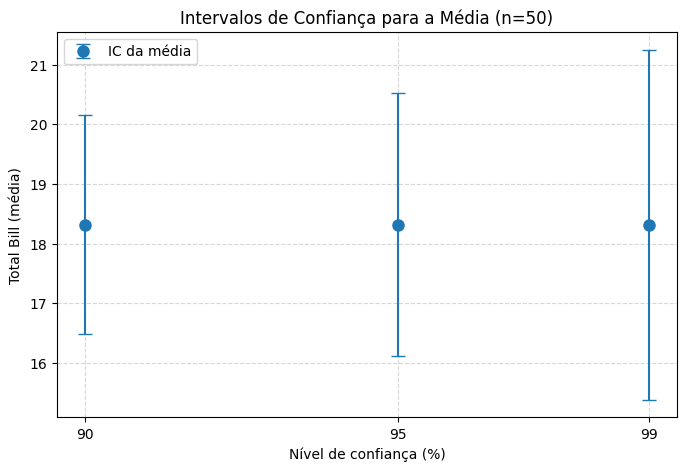

In [ ]:
# =============================================================================
# IC_DEMO.PY — Exemplo de como calcular e visualizar ICs de diferentes níveis
# =============================================================================

# 1) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 2) Carregar dataset de exemplo (pode trocar por qualquer outro)
df = sns.load_dataset("tips")

# 3) Selecionar a variável e tirar uma amostra aleatória
np.random.seed(0)
n =  fifty = 50  # tamanho da amostra
sample = df["total_bill"].sample(n=n)

# 4) Estatísticas básicas da amostra
x_bar = sample.mean()
s = sample.std(ddof=1)
print(f"Média amostral = {x_bar:.3f}")
print(f"Desvio padrão amostral = {s:.3f}\n")

# 5) Função para calcular IC via t-distribuição
def ic_t(sample_mean, sample_std, n, confidence=0.95):
    alpha = 1 - confidence
    df = n - 1
    t_crit = stats.t.ppf(1 - alpha/2, df)
    se = sample_std / np.sqrt(n)
    margin = t_crit * se
    return sample_mean - margin, sample_mean + margin

# 6) Calcular ICs para vários níveis
confs = [0.90, 0.95, 0.99]
results = []
for conf in confs:
    lower, upper = ic_t(x_bar, s, n, confidence=conf)
    results.append((conf, lower, upper))
    print(f"{int(conf*100)}% IC: [{lower:.3f}, {upper:.3f}]")

# 7) Montar DataFrame para plot
ic_df = pd.DataFrame(results, columns=["confidence", "lower", "upper"])
ic_df["mean"] = x_bar

# 8) Plotar
fig, ax = plt.subplots(figsize=(8, 5))

# pontos centrais
ax.errorbar(
    x=ic_df["confidence"]*100,      # 90, 95, 99
    y=ic_df["mean"],
    yerr=[ic_df["mean"] - ic_df["lower"], ic_df["upper"] - ic_df["mean"]],
    fmt='o',                          # marcador
    capsize=5,                        # “tampinhas” nas barras
    markersize=8,
    label="IC da média"
)

ax.set_xlabel("Nível de confiança (%)")
ax.set_ylabel("Total Bill (média)")
ax.set_title("Intervalos de Confiança para a Média (n=50)")
ax.set_xticks([90, 95, 99])
ax.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()


In [ ]:
# =============================================================================
# TESTE T DE DUAS AMOSTRAS — Exemplo completo
# =============================================================================

import numpy as np
from scipy import stats

# 1) Gerar dados sintéticos para dois grupos
# ---------------------------------------------------
# Grupo Controle: média 50, desvio 5, n=30
np.random.seed(0)
controle = np.random.normal(loc=50, scale=5, size=30)

# Grupo Teste: média 53, desvio 5, n=30
# (você pode alterar a média para ver casos de H0 verdadeira vs falsa)
teste = np.random.normal(loc=53, scale=5, size=30)

# 2) Formulação das hipóteses
# ---------------------------------------------------
# H0 (hipótese nula): μ_controle = μ_teste
# H1 (alternativa)    : μ_controle != μ_teste

# 3) Estatísticas descritivas
# ---------------------------------------------------
mean_c, std_c = controle.mean(), controle.std(ddof=1)
mean_t, std_t = teste.mean(), teste.std(ddof=1)
print("Estatísticas amostrais:")
print(f"  Controle — média = {mean_c:.2f},  desvio = {std_c:.2f}")
print(f"  Teste    — média = {mean_t:.2f},  desvio = {std_t:.2f}\n")

# 4) Teste t de duas amostras independentes
# ---------------------------------------------------
# equal_var=True assume variâncias iguais; ajuste conforme seu caso
t_stat, p_value = stats.ttest_ind(controle, teste, equal_var=True)
print("Resultado do teste t:")
print(f"  t-statistic = {t_stat:.3f}")
print(f"  p-value     = {p_value:.3f}\n")

# 5) Decisão a nível de significância α = 0.05
# ---------------------------------------------------
alpha = 0.05
if p_value < alpha:
    print(f"p-value ({p_value:.3f}) < α ({alpha}) ⇒ rejeitamos H0.")
    print("Conclusão: há evidência estatística de diferença entre as médias.")
else:
    print(f"p-value ({p_value:.3f}) ≥ α ({alpha}) ⇒ NÃO rejeitamos H0.")
    print("Conclusão: não há evidência estatística de diferença entre as médias.")


Estatísticas amostrais:
  Controle — média = 52.21,  desvio = 5.50
  Teste    — média = 51.55,  desvio = 4.57

Resultado do teste t:
  t-statistic = 0.507
  p-value     = 0.614

p-value (0.614) ≥ α (0.05) ⇒ NÃO rejeitamos H0.
Conclusão: não há evidência estatística de diferença entre as médias.


In [ ]:
import numpy as np
from scipy.stats import ttest_ind


num_simulations = 10000
sample_size = 30
true_mean = 50
true_std = 10
significance_level = [0.05, 0.01]


significant_results = []


for alpha in significance_levels:
    significant_results = 0
    for _ in range(num_simulations):
        group1 = np.random.normal(true_mean, true_std, sample_size)
        group2 = np.random.normal(true_mean, true_std, sample_size)
        _, p_value = ttest_ind(group1, group2)
        if p_value < alpha:
            significant_results += 1
    prop = significant_results / num_simulations
    results.append((alpha, prop))



proportion_significant = significant_results / num_simulations


print(f"Number of simulations: {num_simulations}")
print(f"Significance level (alpha): {significance_level}")
print(f"Proportion of significant results (Type I error rate): {proportion_significant:.4f}")




Number of simulations: 10000
Significance level (alpha): [0.05, 0.01]
Proportion of significant results (Type I error rate): 0.0104
